<a href="https://colab.research.google.com/github/nrjcs/foundation_aiml/blob/master/own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image classification using our own data with Keras



> Before proceeding make sure that the data (with which you would like to perform classification) is available in your Google Drive

> Data used in this example, is a subset of Kaggle dataset (availabel @ https://www.microsoft.com/en-us/download/details.aspx?id=54765)

> Data consists of 100 images of cats and dogs each

> Data is in the directory "img_data", in your drive...if you would like to put in different directory then update ip_path variable in incoming cell 




In [0]:
#intialization 
train_labels=[]
train_samples=[]


**load the Drive helper and mount**

following code cell is to link your drive with Colab...the procedure for the same is as follows:

> execute this code cell -> click the link that you will get as output -> select the account to sign with which the Google Drive is associated -> copy the code -> (switch back to this page) -> paste the copied code in the box following the message "Enter your authorization code:" in the output pane on execution of following code you will get a link -> press enter

In [0]:


from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/img_data/"

100.jpg  121.jpg  142.jpg  163.jpg  184.jpg  23.jpg  44.jpg  65.jpg  86.jpg
101.jpg  122.jpg  143.jpg  164.jpg  185.jpg  24.jpg  45.jpg  66.jpg  87.jpg
102.jpg  123.jpg  144.jpg  165.jpg  186.jpg  25.jpg  46.jpg  67.jpg  88.jpg
103.jpg  124.jpg  145.jpg  166.jpg  187.jpg  26.jpg  47.jpg  68.jpg  89.jpg
104.jpg  125.jpg  146.jpg  167.jpg  188.jpg  27.jpg  48.jpg  69.jpg  8.jpg
105.jpg  126.jpg  147.jpg  168.jpg  189.jpg  28.jpg  49.jpg  6.jpg   90.jpg
106.jpg  127.jpg  148.jpg  169.jpg  18.jpg   29.jpg  4.jpg   70.jpg  91.jpg
107.jpg  128.jpg  149.jpg  16.jpg   190.jpg  2.jpg   50.jpg  71.jpg  92.jpg
108.jpg  129.jpg  14.jpg   170.jpg  191.jpg  30.jpg  51.jpg  72.jpg  93.jpg
109.jpg  12.jpg   150.jpg  171.jpg  192.jpg  31.jpg  52.jpg  73.jpg  94.jpg
10.jpg	 130.jpg  151.jpg  172.jpg  193.jpg  32.jpg  53.jpg  74.jpg  95.jpg
110.jpg  131.jpg  152.jpg  173.jpg  194.jpg  33.jpg  54.jpg  75.jpg  96.jpg
111.jpg  132.jpg  153.jpg  174.jpg  195.jpg  34.jpg  55.jpg  76.jpg  97.jpg
112.jpg  133.j

In [0]:
!ls "/content/drive/My Drive/img_data_updated/" # the colored images are converted and stored in this directory

In [0]:
# initialization of input and output paths of images
ip_path='/content/drive/My Drive/img_data/'
op_path='/content/drive/My Drive/img_data_updated/'

In [0]:
import os # Miscellaneous operating system interfaces...file and directory related operations among others
from numpy import * #package for scientific computing

#getting list of images
listing=os.listdir(ip_path) #list of the names of the entries in the arg (directory)
num_samples=size(listing)
print(num_samples)


200


In [0]:
#intiatialization
img_rows, img_cols=256, 256
channels=1


from PIL import Image # PIL is the Python Imaging Library ....adds image processing capabilities to your Python interpreter....visit https://pillow.readthedocs.io/en/stable/
#image preprocessing...resize...convert to grayscale....and save to output directory
for file in listing:
    im=Image.open(ip_path+'/'+file)
    img=im.resize((rows,cols))
    gray=img.convert('L')
    gray.save(op_path+'/'+file, "JPEG")
imlist=os.listdir(op_path)  
print (imlist)

['104.jpg', '169.jpg', '23.jpg', '101.jpg', '163.jpg', '29.jpg', '106.jpg', '167.jpg', '31.jpg', '110.jpg', '175.jpg', '32.jpg', '109.jpg', '165.jpg', '36.jpg', '103.jpg', '171.jpg', '33.jpg', '102.jpg', '176.jpg', '37.jpg', '107.jpg', '172.jpg', '38.jpg', '105.jpg', '173.jpg', '108.jpg', '35.jpg', '166.jpg', '118.jpg', '42.jpg', '179.jpg', '113.jpg', '40.jpg', '177.jpg', '111.jpg', '39.jpg', '174.jpg', '114.jpg', '45.jpg', '180.jpg', '129.jpg', '43.jpg', '178.jpg', '117.jpg', '44.jpg', '188.jpg', '115.jpg', '189.jpg', '46.jpg', '116.jpg', '47.jpg', '184.jpg', '112.jpg', '41.jpg', '186.jpg', '119.jpg', '50.jpg', '185.jpg', '120.jpg', '55.jpg', '181.jpg', '126.jpg', '49.jpg', '190.jpg', '121.jpg', '187.jpg', '48.jpg', '128.jpg', '183.jpg', '52.jpg', '124.jpg', '53.jpg', '182.jpg', '122.jpg', '51.jpg', '6.jpg', '135.jpg', '59.jpg', '5.jpg', '125.jpg', '58.jpg', '7.jpg', '123.jpg', '56.jpg', '3.jpg', '127.jpg', '66.jpg', '4.jpg', '130.jpg', '67.jpg', '2.jpg', '131.jpg', '61.jpg', '8.jpg',

In [0]:
# sort....
imlist.sort(key=lambda f: int(filter(str.isdigit, f)))
print (imlist)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '101.jp

(256, 256)
256 256


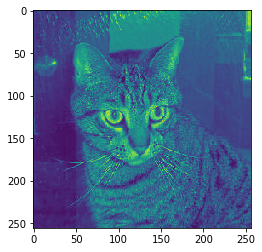

In [0]:
# viewing images

import matplotlib.pyplot as plt

im1=array(Image.open('/content/drive/My Drive/img_data_updated/'+imlist[0]))
plt.imshow(im1)
#plt.imshow(im1,cmap='gray')
print(im1.shape)
m,n=im1.shape[0:2]
print m,m

In [0]:
#flatten all the images into one matrix
img_mat=array([array(Image.open('/content/drive/My Drive/img_data_updated/'+imseq)).flatten() 
           for imseq in imlist],'f')

#print img_mat
#print img_mat.shape

In [0]:
import numpy as np
# initialize labels
labels=np.ones((num_samples),dtype=int)
print labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
#reset labels
labels[0:100]=0
labels[100:200]=1
print labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
from sklearn.utils import shuffle
#make sample label pairs
data,label=shuffle(img_mat,labels)
#for i in range(200):
#   print data[i],label[i]

In [0]:
#combine data and labels as single input

#this step in not necessary as we can input the data and label as two arrarys
train_data=[data,label]
#print train_data[0].shape #shape of samples

#print train_data[1].shape #shape of labels
#print train_data

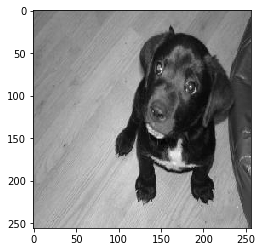

In [0]:
#check the images from the flattened matrix
check_img=img_mat[111].reshape(img_rows,img_cols)
plt.imshow(check_img)
plt.imshow(check_img,cmap='gray')

In [0]:
#model parameters

batch_size=20
n_classes=2
n_epochs=10
channels=1 # no. of imagae channels
n_filters=32 #no. of conv filters to use
n_pool=2  #size of area for max pooling
n_conv=3  #size of conv kernel

(X,Y)=(train_data[0],train_data[1])  
#print (X,Y)


In [0]:
from sklearn.model_selection import train_test_split
# preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=4)
X_train=X_train.reshape(X_train.shape[0],1,img_rows,img_cols)
print X_train.shape
X_test=X_test.reshape(X_test.shape[0],1,img_rows,img_cols)
print X_test.shape

X_train/=255
X_test/=255

# following steps make one hot matrix used by the model to fit data
print Y_train.shape   #current shape
print Y_test.shape

from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train,n_classes)
Y_test=np_utils.to_categorical(Y_test,n_classes)
#print Y_train.shape
#print Y_test.shape
#print Y_test

(180, 1, 256, 256)
(20, 1, 256, 256)
(180,)
(20,)


('label:', array([1., 0.], dtype=float32))


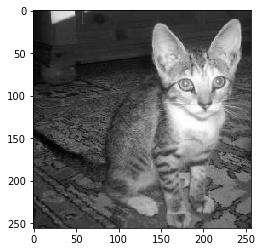

In [0]:
# test the modifations of data and lables

plt.imshow(X_train[112,0],interpolation='nearest',cmap='gray')
print("label:",Y_train[112,:])

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first') # set format

# deifne the model layout
model=Sequential()  #type of model

#add layers to the model

model.add(Convolution2D(n_filters,n_conv,n_conv,border_mode='valid',input_shape=(1,img_rows,img_cols)))
convol1=Activation('relu')
model.add(convol1)
model.add(Convolution2D(n_filters,n_conv,n_conv))
convol2=Activation('relu')
model.add(convol2)
model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))



Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="valid", input_shape=(1, 256, 2...)`
  if sys.path[0] == '':


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  from ipykernel import kernelapp as app


In [0]:
# compile the model

model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# print the model summary

#model.summary()

In [0]:
# train the model

trainin=model.fit(X_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 180 samples, validate on 20 samples
Epoch 1/10
180/180 [==============================] - 68s 379ms/step - loss: 7.2434 - acc: 0.4833 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 2/10
180/180 [==============================] - 62s 345ms/step - loss: 7.7904 - acc: 0.5167 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 3/10
180/180 [==============================] - 62s 345ms/step - loss: 7.7904 - acc: 0.5167 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 4/10
180/180 [==============================] - 62s 346ms/step - loss: 7.7904 - acc: 0.5167 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 5/10
180/180 [==============================] - 62s 345ms/step - loss: 7.7904 - acc: 0.5167 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 6/10
180/180 [==============================] - 61s 341ms/step - loss: 7.7904 - acc: 0.5167 - val_loss: 10.4768 - val_acc: 0.3500
Epoch 7/10
180/180 [==============================] - 62s 342ms/step - loss: 7.7904 - acc: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 10.476762771606445)
('Test accuracy:', 0.3499999940395355)
